# L2-Loss
--------

Here, we will illustrate linear regression with the L2-Loss..

The equation for the L2 Loss for Linear Least Squares is

$$S = \sum_{i=1}^{N}\left( y_{i} - \hat{y_{i}} \right)^{2}$$

Where $N$ is the number of data points, $y_{i}$ is the i-th actual y-values, $\hat{y_{i}}$ is the predicted i-th y-value.

We start a computational graph session.

In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [73]:
iris = load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

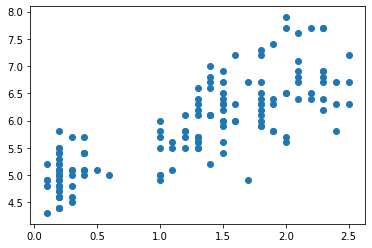

In [74]:
plt.scatter(x_vals,y_vals)

In [75]:
# Declare Batch
batch_size = 25

In [76]:
# Create variables for linear regression
W = tf.Variable(tf.random.normal(shape=[1,1]))
B = tf.Variable(tf.random.normal(shape=[1,1]))


deltaW = tf.constant(0,tf.float32)
deltaB = tf.constant(0,tf.float32)
loss = tf.constant(0,tf.float32)


In [86]:
epochs = []
loss = []

for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    with tf.GradientTape() as tape:
        prediction = W * rand_x + B
        error = (prediction - rand_y)
        squaredError = tf.square(error)
        loss_ = tf.reduce_mean(input_tensor=squaredError)
        deltaW,deltaB = tape.gradient(loss_,[W,B])
        
    changeW = deltaW * 0.01
    changeB = deltaB * 0.01
    
    epochs.append(i)
    loss.append(loss_)
    
    W.assign_sub(changeW)
    B.assign_sub(changeB)

In [87]:
best_fit = []
for i in x_vals:
    best_fit.append(W[0][0].numpy() * i + B[0][0].numpy())

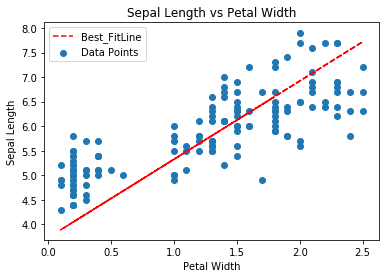

In [96]:
plt.scatter(x_vals,y_vals,label='Data Points')
plt.plot(x_vals,best_fit,'r--',label="Best_FitLine")
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


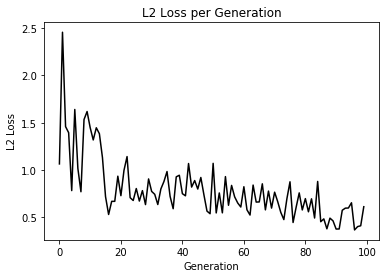

In [97]:
# Plot loss over time
plt.plot(loss, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()